# Import Required Library.

In [4]:
# Step1: Import pandas and other library.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Import Data.

In [38]:
from sklearn.datasets import load_digits

In [6]:
df = load_digits()

In [7]:
df

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

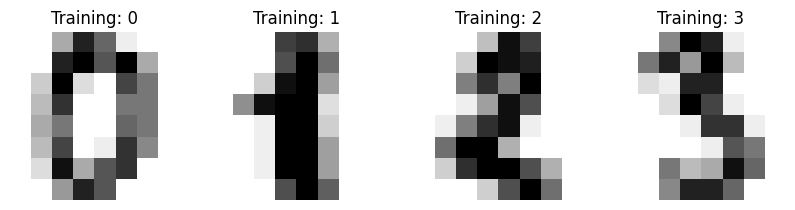

In [9]:
# Create a figure with 4 subplots.
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))

# Iterate over the first 4 images and labels in the dataset.
for ax, image, label in zip(axes, df.images[:4], df.target[:4]):

    # Turn off the axis labels and ticks.
    ax.set_axis_off()

    # Display the image using the `imshow()` function.
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")

    # Set the title of the subplot.
    ax.set_title("Training: %d" % label)

# Display the figure.
plt.show()

# Data Preprocessing

In [10]:
df.images.shape

(1797, 8, 8)

In [11]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [12]:
df.images[0].shape

(8, 8)

In [13]:
len(df.images)

1797

In [14]:
n_samples = len(df.images)
data = df.images.reshape((n_samples, -1))

In [15]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [16]:
data[0].shape

(64,)

In [17]:
data.shape

(1797, 64)

# Scaling Image Data

In [18]:
data.min()

0.0

In [19]:
data.max()

16.0

In [20]:
data = data/16

In [22]:
data.min()

0.0

In [23]:
data.max()

1.0

In [24]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

# Train Test and Split.

In [25]:
from sklearn.model_selection import train_test_split

In [27]:
x_train, x_test, y_train, y_test = train_test_split(data, df.target, test_size = 0.3 )

In [28]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

# Random Forest Classifier.

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
rf = RandomForestClassifier()

In [31]:
rf.fit(x_train, y_train)

RandomForestClassifier()

# Predicting Test Data.

In [32]:
y_pred =rf.predict(x_test)

In [33]:
y_pred

array([2, 3, 0, 4, 1, 3, 9, 7, 1, 4, 0, 6, 9, 4, 9, 4, 4, 8, 3, 0, 4, 2,
       5, 5, 5, 7, 3, 0, 9, 7, 5, 5, 1, 3, 7, 9, 4, 3, 0, 5, 3, 5, 1, 8,
       4, 5, 4, 9, 3, 4, 0, 9, 5, 1, 6, 0, 4, 5, 2, 1, 9, 7, 1, 7, 6, 3,
       4, 1, 2, 6, 7, 5, 0, 5, 6, 6, 9, 9, 0, 9, 1, 6, 2, 4, 6, 1, 5, 6,
       7, 0, 2, 2, 2, 3, 2, 6, 3, 7, 0, 2, 1, 1, 5, 7, 1, 1, 5, 3, 3, 9,
       3, 0, 2, 4, 0, 9, 0, 5, 0, 2, 7, 9, 8, 6, 1, 3, 7, 5, 1, 2, 8, 1,
       4, 5, 4, 2, 0, 9, 3, 6, 4, 2, 4, 6, 1, 0, 3, 2, 9, 0, 8, 4, 5, 0,
       7, 8, 2, 5, 6, 7, 8, 2, 6, 2, 5, 1, 2, 2, 1, 9, 7, 3, 4, 8, 1, 6,
       9, 4, 5, 3, 2, 6, 8, 6, 1, 7, 3, 6, 7, 8, 1, 6, 6, 2, 1, 5, 4, 2,
       6, 1, 1, 0, 2, 6, 5, 0, 8, 3, 1, 8, 0, 0, 8, 1, 5, 0, 5, 3, 8, 7,
       2, 9, 4, 1, 1, 4, 9, 4, 8, 6, 3, 0, 4, 0, 7, 3, 7, 9, 2, 3, 2, 6,
       8, 1, 2, 5, 5, 9, 3, 3, 1, 8, 4, 4, 4, 8, 4, 6, 9, 9, 4, 5, 7, 8,
       5, 4, 2, 6, 6, 9, 6, 1, 6, 9, 1, 9, 6, 9, 1, 6, 8, 5, 3, 7, 4, 4,
       0, 7, 9, 8, 8, 8, 8, 5, 6, 1, 2, 7, 4, 8, 0,

# Accuracy Of The Model.

In [34]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [35]:
accuracy = accuracy_score(y_test, y_pred)*100
print(f"Accuracy: {accuracy}")

Accuracy: 97.03703703703704


In [36]:
confusion_matrix(y_test,y_pred)

array([[47,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 56,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  2, 60,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 50,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 54,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  1, 48,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1, 58,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 47,  0,  1],
       [ 0,  2,  0,  0,  0,  1,  0,  1, 54,  0],
       [ 0,  0,  0,  0,  0,  2,  0,  0,  1, 50]])

In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        48
           1       0.93      1.00      0.97        56
           2       1.00      0.97      0.98        62
           3       1.00      0.98      0.99        51
           4       0.96      0.96      0.96        56
           5       0.91      0.98      0.94        49
           6       1.00      0.98      0.99        59
           7       0.94      0.98      0.96        48
           8       0.98      0.93      0.96        58
           9       0.98      0.94      0.96        53

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540

